In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special 
from scipy.interpolate import interp1d

ws_found= [8.72678859 5.70513626 4.30482266 3.48368783 2.93865373 2.54864442
 2.25417984 2.02368309 1.8379541  1.6846578  1.55595145 1.44627426
 1.35162022 1.26904483 1.19630761 1.13169877 1.07394598 1.02199838
 0.97500939 0.93229287 0.8932814  0.85750846 0.82458205 0.79417226
 0.76598976 0.73979441 0.71539039 0.69260066 0.67126755 0.6611042 ]


C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Capacitance as a function of sqrt(r1*r2)')

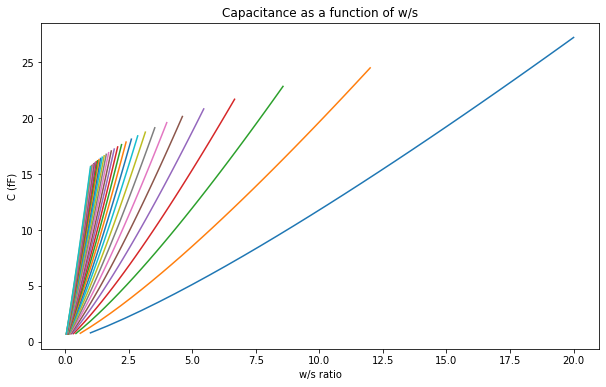

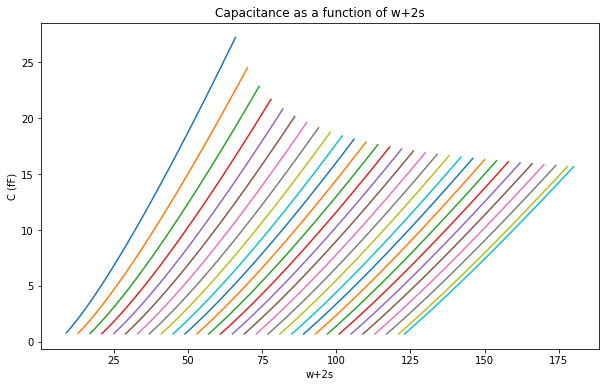

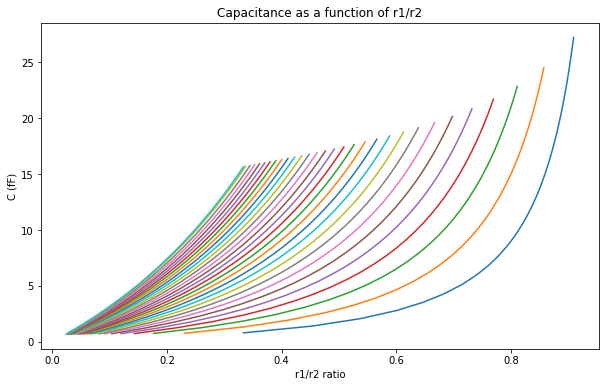

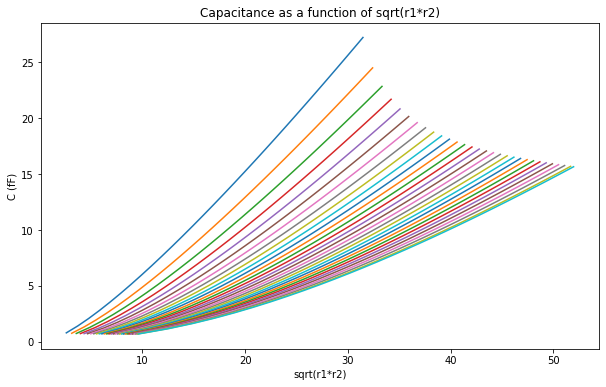

In [68]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\C_ws2.xlsx')
#print (df)
df2=df.as_matrix()
C = df2[0:31, 1:31]
w = np.array([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,60])
s = w
r1 = (w)/2

ws_matrix = np.zeros((len(w), len(w)))
for i in range(len(w)):
    for j in range(len(s)):
        ws_matrix[i,j] = w[i]/s[j]
#print(ws_matrix)       

r1r2_matrix = np.zeros((len(w), len(w)))
r2 = np.zeros((len(w),len(w)))
for i in range(len(w)):
    for j in range(len(s)):
        r2[i,j] = r1[i] + s[j]
        r1r2_matrix[i,j] = r1[i]/r2[i,j]

r1xr2_matrix = np.zeros((len(w), len(w)))
for i in range(len(w)):
    for j in range(len(s)):
        r1xr2_matrix[i,j] = np.sqrt(r1[i]*r2[i,j])
        
wxs_matrix = np.zeros((len(w), len(w)))
for i in range(len(w)):
    for j in range(len(s)):
        wxs_matrix[i,j] = w[i]+2*s[j] #np.sqrt(w[i]*s[j])


C_desired = 10
ws_found = np.zeros(len(w))
if np.all(np.diff(ws_matrix[:,i]) > 0) == True and np.all(np.diff(C[:,i]) > 0):
    for i in range(len(w)):
        ws_found[i] = np.interp(C_desired, C[:,i], ws_matrix[:,i])  
    print('ws_found=', ws_found)
else:
    print('x is not always increasing!!')

    
fig1 = plt.figure(figsize=(10,6))
plt.plot(ws_matrix, C)
plt.xlabel('w/s ratio')
plt.ylabel('C (fF)')
plt.title('Capacitance as a function of w/s')

fig2 = plt.figure(figsize=(10,6))
plt.plot(wxs_matrix, C)
plt.xlabel('w+2s')
plt.ylabel('C (fF)')
plt.title('Capacitance as a function of w+2s')

fig3 = plt.figure(figsize=(10,6))
plt.plot(r1r2_matrix, C)
plt.xlabel('r1/r2 ratio')
plt.ylabel('C (fF)')
plt.title('Capacitance as a function of r1/r2')

fig4 = plt.figure(figsize=(10,6))
plt.plot(r1xr2_matrix, C)
plt.xlabel('sqrt(r1*r2)')
plt.ylabel('C (fF)')
plt.title('Capacitance as a function of sqrt(r1*r2)')





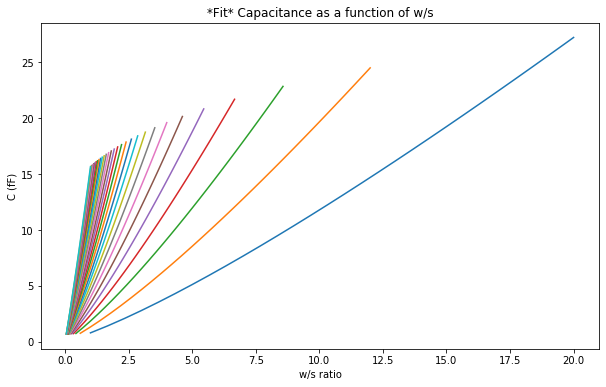

In [3]:
fig = plt.figure(figsize=(10,6))
plt.xlabel('w/s ratio')
plt.ylabel('C (fF)')
plt.title('*Fit* Capacitance as a function of w/s')
for i in range(len(w)):
    f = interp1d(ws_matrix[:,i], C[:,i])    
    plt.plot(ws_matrix[:,i], f(ws_matrix[:,i]))

C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


P_found= [0.00234953 0.00178851 0.00152063 0.0013616  0.00125659 0.00118081
 0.0011249  0.00108105 0.00104561 0.0010169  0.00099316 0.00097287
 0.00095535 0.00094001 0.00092662 0.00091509 0.00090487 0.00089564
 0.00088728 0.00087954 0.00087262 0.00086628 0.00086025 0.00085482
 0.0008497  0.0008451  0.00084093 0.00083683 0.00083309 0.00083137]
29
w/s result =  0.6611041952129613
s result =  60
w result =  39.66625171277768
w + 2s result =  159.66625171277767
ws_found [8.72678859 5.70513626 4.30482266 3.48368783 2.93865373 2.54864442
 2.25417984 2.02368309 1.8379541  1.6846578  1.55595145 1.44627426
 1.35162022 1.26904483 1.19630761 1.13169877 1.07394598 1.02199838
 0.97500939 0.93229287 0.8932814  0.85750846 0.82458205 0.79417226
 0.76598976 0.73979441 0.71539039 0.69260066 0.67126755 0.6611042 ]


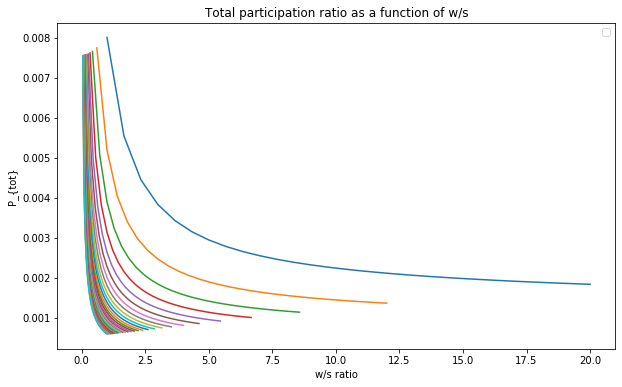

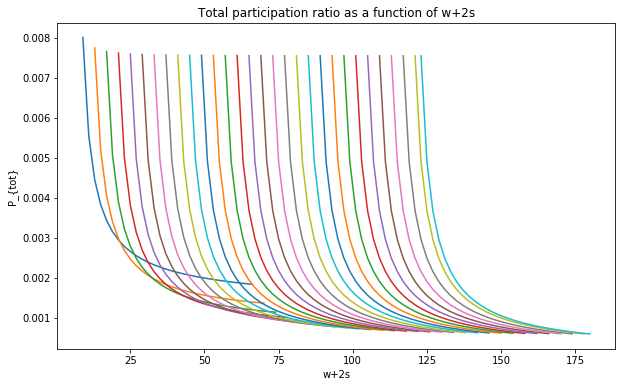

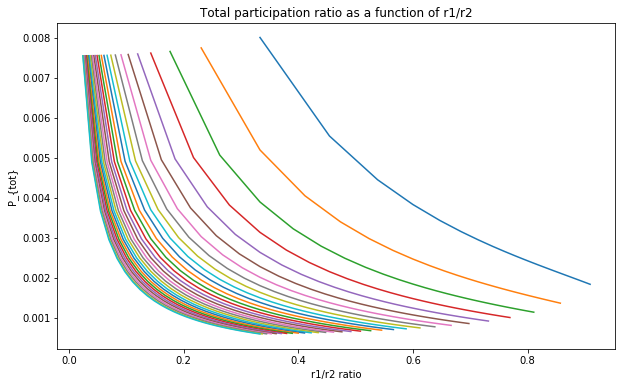

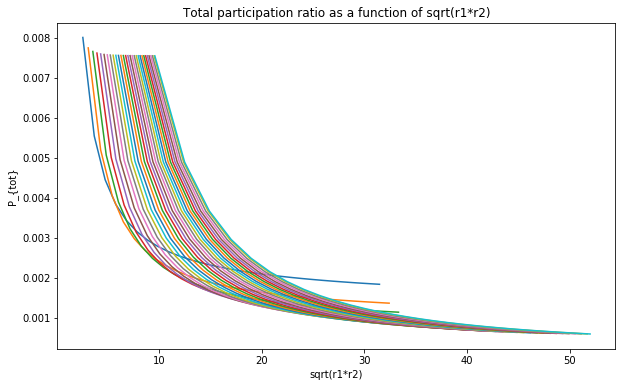

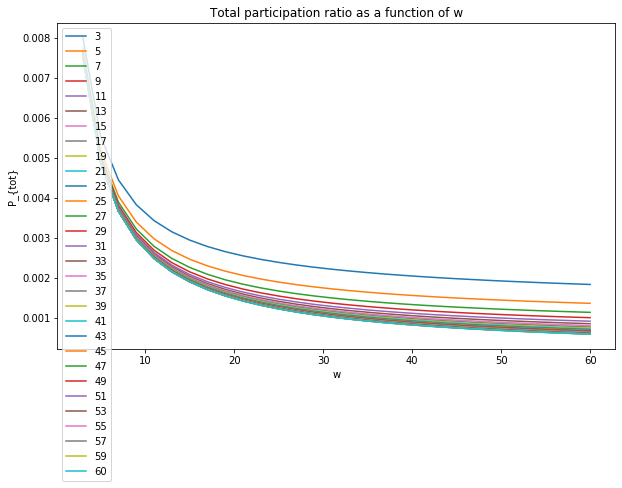

In [71]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_ws2.xlsx')
#print (df)
df2=df.as_matrix()
P_tot = df2[0:31, 1:31]
w = np.array([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,60])
s = w
r1 = (w)/2

ws_matrix = np.zeros((len(w), len(w)))
for i in range(len(w)):
    for j in range(len(s)):
        ws_matrix[i,j] = w[i]/s[j]
        
wxs_matrix = np.zeros((len(w), len(w)))
for i in range(len(w)):
    for j in range(len(s)):
        wxs_matrix[i,j] = w[i]+2*s[j] #np.sqrt(w[i]*s[j])
        
r1r2_matrix = np.zeros((len(w), len(w)))
r2 = np.zeros((len(w),len(w)))
for i in range(len(w)):
    for j in range(len(s)):
        r2[i,j] = r1[i] + s[j]
        r1r2_matrix[i,j] = r1[i]/r2[i,j]

r1xr2_matrix = np.zeros((len(w), len(w)))
for i in range(len(w)):
    for j in range(len(s)):
        r1xr2_matrix[i,j] = np.sqrt(r1[i]*r2[i,j])

P_found = np.zeros(len(w))

for i in range(len(w)):
    if np.all(np.diff(ws_matrix[:,i]) > 0) == True and np.all(np.diff(C[:,i]) > 0):
        P_found[i] = np.interp(ws_found[i], ws_matrix[:,i], P_tot[:,i])  
    
    else:
        print('x is not always increasing!!')

print('P_found=', P_found)
print(np.argmin(P_found))
print('w/s result = ', ws_found[np.argmin(P_found)] )
print('s result = ', s[np.argmin(P_found)])
print('w result = ', s[np.argmin(P_found)]*ws_found[np.argmin(P_found)])
print('w + 2s result = ', s[np.argmin(P_found)]*(ws_found[np.argmin(P_found)]+2))

print('ws_found', ws_found)
    
fig1 = plt.figure(figsize=(10,6))
plt.plot(ws_matrix, P_tot)
plt.xlabel('w/s ratio')
plt.ylabel('P_{tot}')
plt.title('Total participation ratio as a function of w/s')
plt.legend()

fig2 = plt.figure(figsize=(10,6))
plt.plot(wxs_matrix, P_tot)
plt.xlabel('w+2s')
plt.ylabel('P_{tot}')
plt.title('Total participation ratio as a function of w+2s')

fig3 = plt.figure(figsize=(10,6))
plt.plot(r1r2_matrix, P_tot)
plt.xlabel('r1/r2 ratio')
plt.ylabel('P_{tot}')
plt.title('Total participation ratio as a function of r1/r2')

fig4 = plt.figure(figsize=(10,6))
plt.plot(r1xr2_matrix, P_tot)
plt.xlabel('sqrt(r1*r2)')
plt.ylabel('P_{tot}')
plt.title('Total participation ratio as a function of sqrt(r1*r2)')

fig5 = plt.figure(figsize=(10,6))
plt.plot(w, P_tot)
plt.xlabel('w')
plt.ylabel('P_{tot}')
plt.title('Total participation ratio as a function of w')
plt.legend(s)


In [5]:
#updated code where w/s and w are varied

s_found= [41.63329015 24.22877829 16.84193844 12.78202761 10.22725601  8.47855946
  7.21060512  6.25176434  5.50300455  4.90330422  4.41301734  4.00530974]


C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


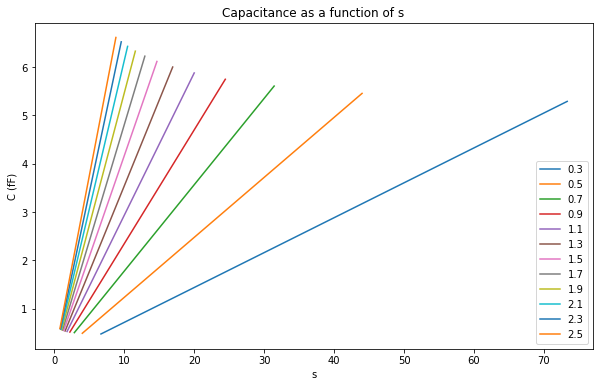

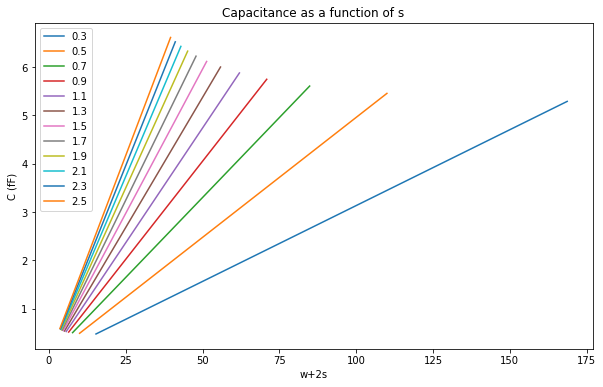

In [72]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\C_ws4.xlsx')
#print (df)
df2=df.as_matrix()
C = df2[0:6, 1:13]
w = np.array([2,6,10,14,18,22])
ws = np.array([0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5])

s_matrix = np.zeros((len(w), len(ws)))
for i in range(len(w)):
    for j in range(len(ws)):
        s_matrix[i,j] = w[i]/ws[j]

length_matrix = np.zeros((len(w), len(ws)))
for i in range(len(w)):
    for j in range(len(ws)):
        length_matrix[i,j] = 2*w[i]/ws[j] + w[i]
        
C_desired = 3
s_found = np.zeros(len(ws))

for i in range(len(ws)):
    if np.all(np.diff(s_matrix[:,i]) > 0) == True and np.all(np.diff(C[:,i]) > 0):
        s_found[i] = np.interp(C_desired, C[:,i], s_matrix[:,i])  
    else:
        print('x is not always increasing!!')
print('s_found=', s_found)
    
fig1 = plt.figure(figsize=(10,6))
plt.plot(s_matrix, C)
plt.xlabel('s')
plt.ylabel('C (fF)')
plt.title('Capacitance as a function of s')
plt.legend(ws)

fig2 = plt.figure(figsize=(10,6))
plt.plot(length_matrix, C)
plt.xlabel('w+2s')
plt.ylabel('C (fF)')
plt.title('Capacitance as a function of s')
plt.legend(ws)



168.66666666666669
s_found= [41.63329015 24.22877829 16.84193844 12.78202761 10.22725601  8.47855946
  7.21060512  6.25176434  5.50300455  4.90330422  4.41301734  4.00530974]
P_found= [0.00228338 0.00237585 0.00246967 0.00256438 0.00265979 0.0027553
 0.00285155 0.00294721 0.00304327 0.00313882 0.00323372 0.00332859]
0
s result =  41.63329015094516
ws result =  0.3
w result =  12.489987045283547
w2s result =  95.75656734717386


C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


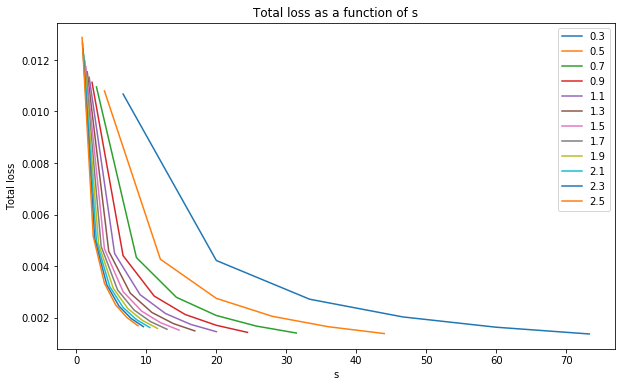

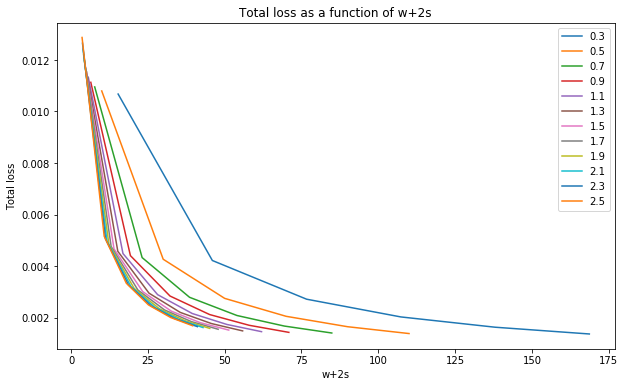

In [76]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_ws4.xlsx')
#print (df)
df2=df.as_matrix()
P_tot = df2[0:6, 1:13]
w = np.array([2,6,10,14,18,22])
ws = np.array([0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5])

s_matrix = np.zeros((len(w), len(ws)))
for i in range(len(w)):
    for j in range(len(ws)):
        s_matrix[i,j] = w[i]/ws[j]

length_matrix = np.zeros((len(w), len(ws)))
for i in range(len(w)):
    for j in range(len(ws)):
        length_matrix[i,j] = 2*w[i]/ws[j] + w[i]

print(np.max(length_matrix))

P_found = np.zeros(len(ws))
for i in range(len(ws)):
        P_found[i] = np.interp(s_found[i], s_matrix[:,i], P_tot[:,i])  

print('s_found=', s_found)
print('P_found=', P_found)
print(np.argmin(P_found))
print('s result = ', s_found[np.argmin(P_found)] )
print('ws result = ', ws[np.argmin(P_found)])
print('w result = ', ws[np.argmin(P_found)]*s_found[np.argmin(P_found)])
print('w2s result = ', ws[np.argmin(P_found)]*s_found[np.argmin(P_found)]+2*s_found[np.argmin(P_found)])
    
fig1 = plt.figure(figsize=(10,6))
plt.plot(s_matrix, P_tot)
plt.xlabel('s')
plt.ylabel('Total loss')
plt.title('Total loss as a function of s')
plt.legend(ws)
#plt.ylim((0.0012,0.003))


fig2 = plt.figure(figsize=(10,6))
plt.plot(length_matrix, P_tot)
plt.xlabel('w+2s')
plt.ylabel('Total loss')
plt.title('Total loss as a function of w+2s')
plt.legend(ws)



In [ ]:
#w+2s is kept constant and w/s is varied. For different w+2s values.
*
*
*
*
*

ws_found= [3.45791011 1.18734564 0.71184355 0.50787272 0.39370096 0.32311476
 0.27271581 0.23571557 0.20786911 0.18638009]


C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


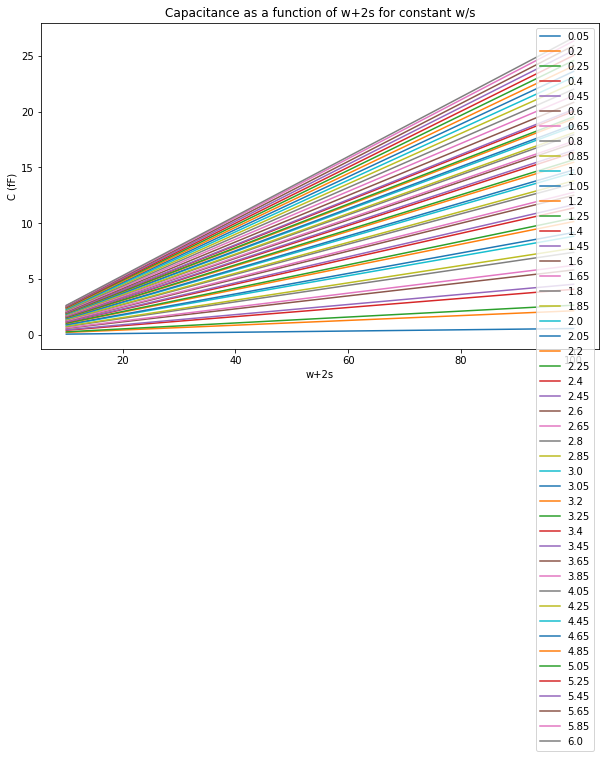

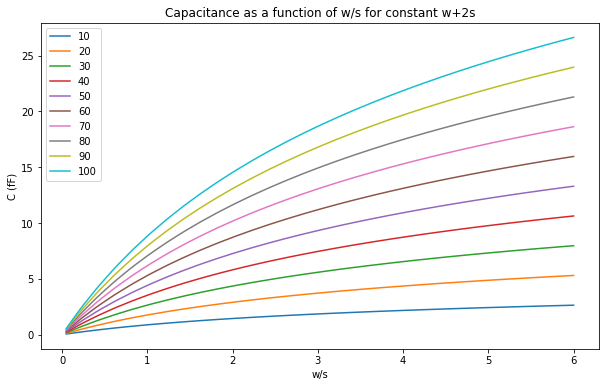

In [152]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\C_ws6.xlsx')
#print (df)
df2=df.as_matrix()
C =  df2[0:10, 1:49]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
ws = np.array([0.05,0.2,0.25,0.4,0.45,0.6,0.65,0.8,0.85,1,1.05,1.2,1.25,1.4,1.45,1.6,1.65,1.8,1.85,2,2.05,2.2,2.25,2.4,2.45,2.6,2.65,2.8,2.85,3,3.05,3.2,3.25,3.4,3.45,3.65,3.85,4.05,4.25,4.45,4.65,4.85,5.05,5.25,5.45,5.65,5.85,6])
       
C_desired = 2
ws_found = np.zeros(len(tot))

for i in range(len(tot)):
    if np.all(np.diff(s_matrix[:,i]) > 0) == True and np.all(np.diff(C[:,i]) > 0):
        ws_found[i] = np.interp(C_desired, C[i,:], ws)  
    else:
        print('x is not always increasing!!')
print('ws_found=', ws_found)

fig1 = plt.figure(figsize=(10,6))
for i in range(len(ws)):
    plt.plot(tot, C[:,i])
plt.xlabel('w+2s')
plt.ylabel('C (fF)')
plt.title('Capacitance as a function of w+2s for constant w/s')
plt.legend(ws)

fig1 = plt.figure(figsize=(10,6))
for i in range(len(tot)):
    plt.plot(ws, C[i,:])
plt.xlabel('w/s')
plt.ylabel('C (fF)')
plt.title('Capacitance as a function of w/s for constant w+2s')
plt.legend(tot)
#plt.ylim((0,0.5))
#plt.xlim((0,0.5))
#for i in range(len(tot)):
 #   plt.plot(ws,(i+1)*C[0,:], 'r:')



ws_found= [3.45791011 1.18734564 0.71184355 0.50787272 0.39370096 0.32311476
 0.27271581 0.23571557 0.20786911 0.18638009]
P_found= [0.00538204 0.00375845 0.00344925 0.00333599 0.00324743 0.00329741
 0.00321466 0.00315622 0.00313286 0.00348156]
min P= 0.0031328585227175035
8
best w+2s= 90
best w/s= 0.20786910766217032


C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 0.0075)

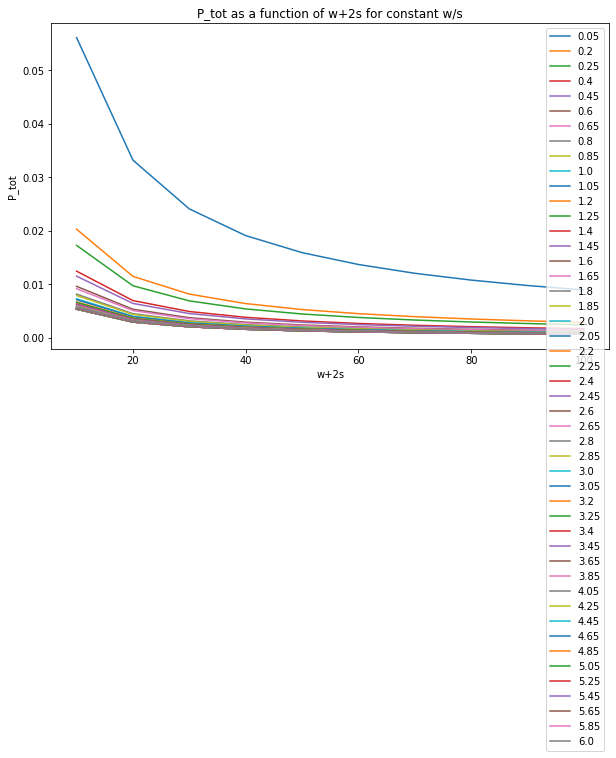

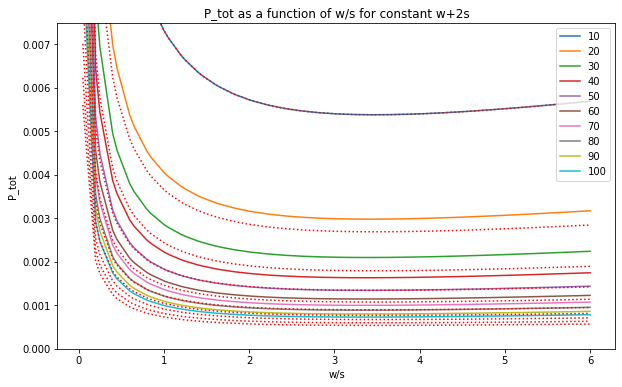

In [158]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_ws6.xlsx')
#print (df)
df2=df.as_matrix()
P_tot = df2[0:10, 1:49]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
ws = np.array([0.05,0.2,0.25,0.4,0.45,0.6,0.65,0.8,0.85,1,1.05,1.2,1.25,1.4,1.45,1.6,1.65,1.8,1.85,2,2.05,2.2,2.25,2.4,2.45,2.6,2.65,2.8,2.85,3,3.05,3.2,3.25,3.4,3.45,3.65,3.85,4.05,4.25,4.45,4.65,4.85,5.05,5.25,5.45,5.65,5.85,6])

P_found = np.zeros(len(tot))
for i in range(len(tot)):
        P_found[i] = np.interp(ws_found[i], ws, P_tot[i,:])  

print('ws_found=', ws_found)
print('P_found=', P_found)
print('min P=', min(P_found))
print(np.argmin(P_found))
print('best w+2s=', tot[np.argmin(P_found)])
print('best w/s=', ws_found[np.argmin(P_found)])

fig1 = plt.figure(figsize=(10,6))
for i in range(len(ws)):
    plt.plot(tot, P_tot[:,i])
plt.xlabel('w+2s')
plt.ylabel('P_tot')
plt.title('P_tot as a function of w+2s for constant w/s')
plt.legend(ws)

fig2 = plt.figure(figsize=(10,6))
for i in range(len(tot)):
    plt.plot(ws, P_tot[i,:])
plt.xlabel('w/s')
plt.ylabel('P_tot')
plt.title('P_tot as a function of w/s for constant w+2s')
plt.legend(tot)

for i in range(len(tot)):
    plt.plot(ws,P_tot[0,:]/(i+1), 'r:')
plt.ylim((0,0.0075))

C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


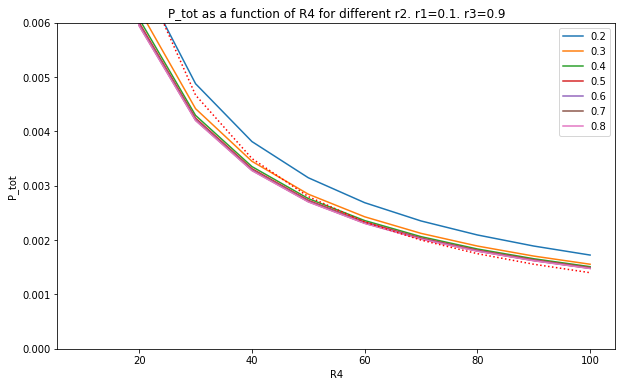

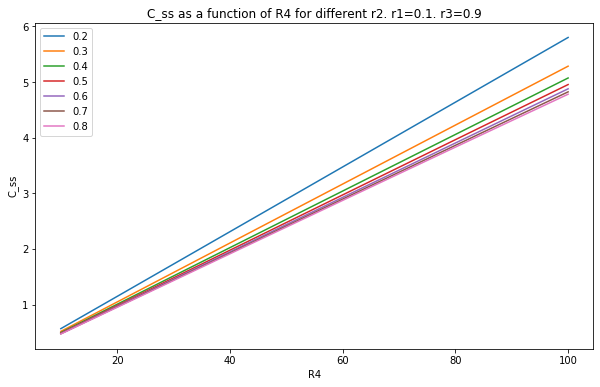

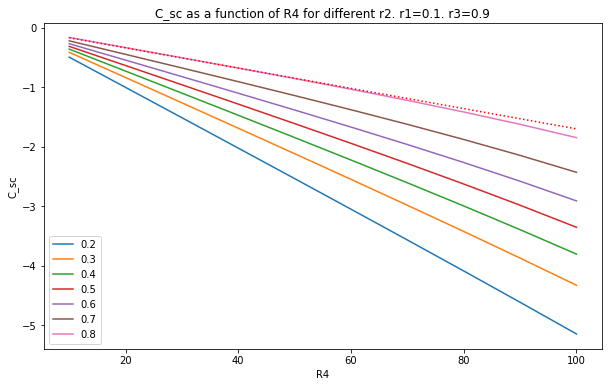

In [61]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_R4_1.xlsx')
dfss = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_1ss.xlsx')
dfsc = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_1sc.xlsx')
df2=df.as_matrix()
df2ss=dfss.as_matrix()
df2sc=dfsc.as_matrix()
P_tot = df2[0:10, 1:8]
C_ss = df2ss[0:10, 1:8]
C_sc = df2sc[0:10, 1:8]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
r2 = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

fig1 = plt.figure(figsize=(10,6))
for i in range(len(r2)):
    plt.plot(tot, P_tot[:,i])
plt.xlabel('R4')
plt.ylabel('P_tot')
plt.title('P_tot as a function of R4 for different r2. r1=0.1. r3=0.9')
plt.legend(r2)
plt.ylim((0,0.006))
#plt.xlim((0,0.5))

plt.plot(tot, 1/tot*0.14, 'r:')

fig2 = plt.figure(figsize=(10,6))
for i in range(len(r2)):
    plt.plot(tot, C_ss[:,i])
plt.xlabel('R4')
plt.ylabel('C_ss')
plt.title('C_ss as a function of R4 for different r2. r1=0.1. r3=0.9')
plt.legend(r2)

fig3 = plt.figure(figsize=(10,6))
for i in range(len(r2)):
    plt.plot(tot, C_sc[:,i])
plt.xlabel('R4')
plt.ylabel('C_sc')
plt.title('C_sc as a function of R4 for different r2. r1=0.1. r3=0.9')
plt.legend(r2)

plt.plot(tot, tot*-.017, 'r:')

C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


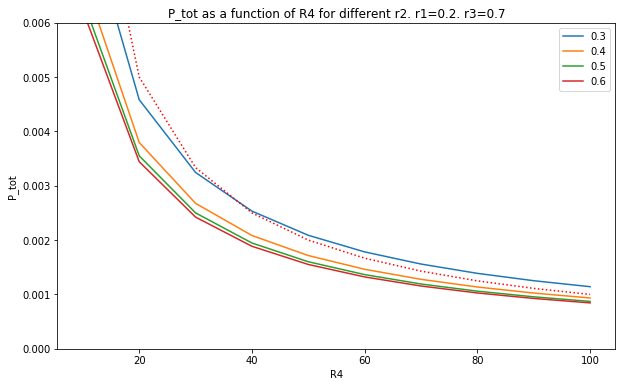

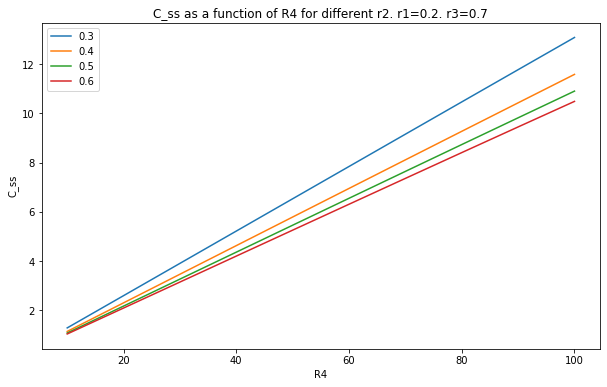

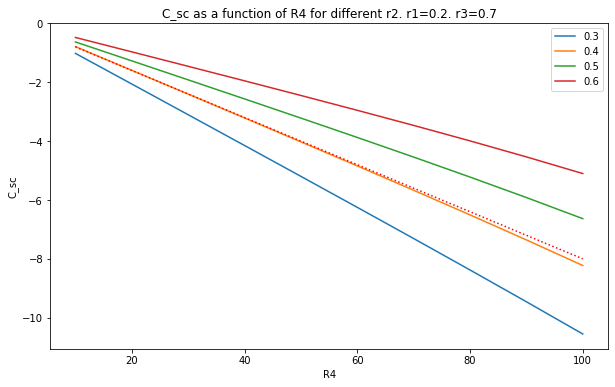

In [65]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_6P.xlsx')
dfss = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_6ss.xlsx')
dfsc = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_6sc.xlsx')
df2=df.as_matrix()
df2ss=dfss.as_matrix()
df2sc=dfsc.as_matrix()
P_tot = df2[0:10, 1:5]
C_ss = df2ss[0:10, 1:5]
C_sc = df2sc[0:10, 1:5]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
r2 = np.array([0.3, 0.4, 0.5, 0.6])

fig1 = plt.figure(figsize=(10,6))
for i in range(len(r2)):
    plt.plot(tot, P_tot[:,i])
plt.xlabel('R4')
plt.ylabel('P_tot')
plt.title('P_tot as a function of R4 for different r2. r1=0.2. r3=0.7')
plt.legend(r2)
plt.ylim((0,0.006))
#plt.xlim((0,0.5))

plt.plot(tot, 1/tot*0.10, 'r:')

fig2 = plt.figure(figsize=(10,6))
for i in range(len(r2)):
    plt.plot(tot, C_ss[:,i])
plt.xlabel('R4')
plt.ylabel('C_ss')
plt.title('C_ss as a function of R4 for different r2. r1=0.2. r3=0.7')
plt.legend(r2)

fig3 = plt.figure(figsize=(10,6))
for i in range(len(r2)):
    plt.plot(tot, C_sc[:,i])
plt.xlabel('R4')
plt.ylabel('C_sc')
plt.title('C_sc as a function of R4 for different r2. r1=0.2. r3=0.7')
plt.legend(r2)

plt.plot(tot, tot*-.080, 'r:')

C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


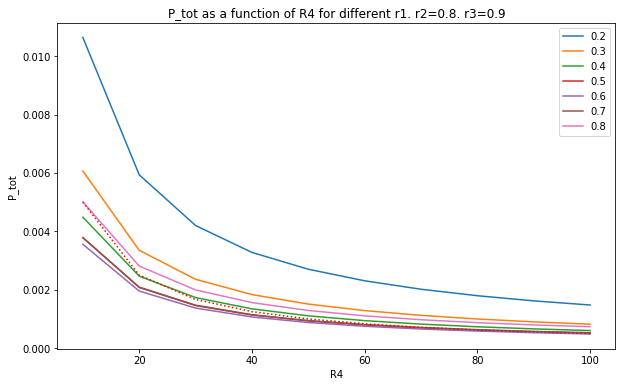

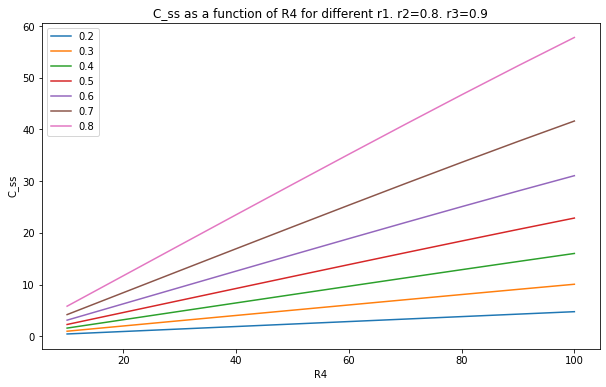

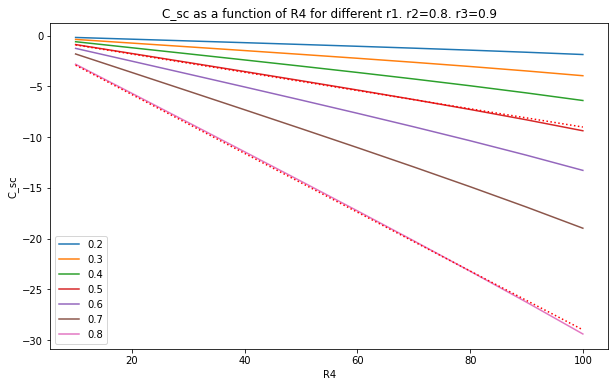

In [33]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_R4_2.xlsx')
dfss = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_R4_2ss.xlsx')
dfsc = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_R4_2sc.xlsx')
df2=df.as_matrix()
df2ss=dfss.as_matrix()
df2sc=dfsc.as_matrix()
P_tot = df2[0:10, 1:8]
C_ss = df2ss[0:10, 1:8]
C_sc = df2sc[0:10, 1:8]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
r1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

fig1 = plt.figure(figsize=(10,6))
for i in range(len(r1)):
    plt.plot(tot, P_tot[:,i])
plt.xlabel('R4')
plt.ylabel('P_tot')
plt.title('P_tot as a function of R4 for different r1. r2=0.8. r3=0.9')
plt.legend(r2)
#plt.ylim((0,0.01))
#plt.xlim((0,0.5))
plt.plot(tot, 1/tot*0.05, 'r:')

fig2 = plt.figure(figsize=(10,6))
for i in range(len(r1)):
    plt.plot(tot, C_ss[:,i])
plt.xlabel('R4')
plt.ylabel('C_ss')
plt.title('C_ss as a function of R4 for different r1. r2=0.8. r3=0.9')
plt.legend(r2)

fig3 = plt.figure(figsize=(10,6))
for i in range(len(r1)):
    plt.plot(tot, C_sc[:,i])
plt.xlabel('R4')
plt.ylabel('C_sc')
plt.title('C_sc as a function of R4 for different r1. r2=0.8. r3=0.9')
plt.legend(r2)
plt.plot(tot, tot*-.29, 'r:')
plt.plot(tot, tot*-.09, 'r:')

C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


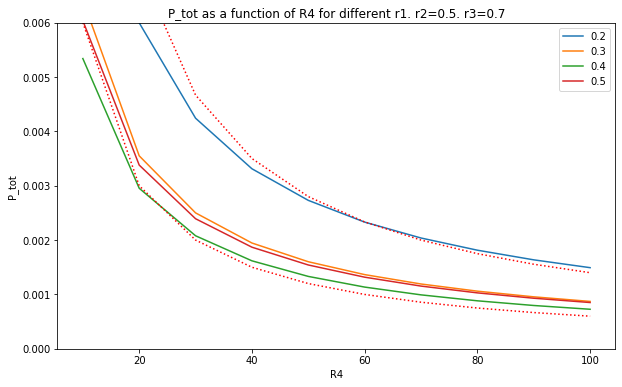

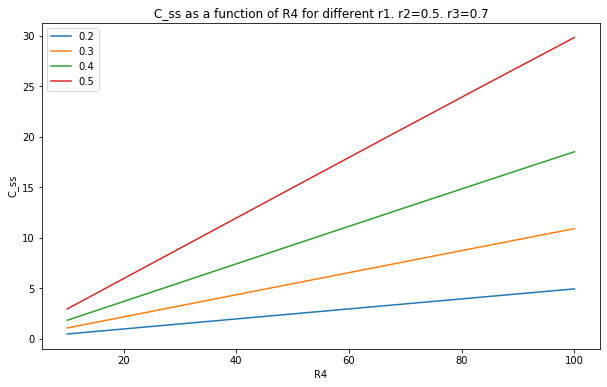

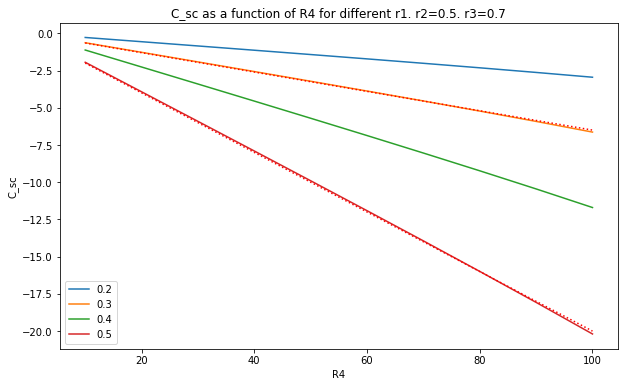

In [44]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_R4_3.xlsx')
dfss = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_R4_3ss.xlsx')
dfsc = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\P_total_R4_3sc.xlsx')
df2=df.as_matrix()
df2ss=dfss.as_matrix()
df2sc=dfsc.as_matrix()
P_tot = df2[0:10, 1:5]
C_ss = df2ss[0:10, 1:5]
C_sc = df2sc[0:10, 1:5]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
r1 = np.array([0.1, 0.2, 0.3, 0.4])

fig1 = plt.figure(figsize=(10,6))
for i in range(len(r1)):
    plt.plot(tot, P_tot[:,i])
plt.xlabel('R4')
plt.ylabel('P_tot')
plt.title('P_tot as a function of R4 for different r1. r2=0.5. r3=0.7')
plt.legend(r2)
plt.ylim((0,0.006))
#plt.xlim((0,0.5))
plt.plot(tot, 1/tot*0.06, 'r:')
plt.plot(tot, 1/tot*0.14, 'r:')

fig2 = plt.figure(figsize=(10,6))
for i in range(len(r1)):
    plt.plot(tot, C_ss[:,i])
plt.xlabel('R4')
plt.ylabel('C_ss')
plt.title('C_ss as a function of R4 for different r1. r2=0.5. r3=0.7')
plt.legend(r2)

fig3 = plt.figure(figsize=(10,6))
for i in range(len(r1)):
    plt.plot(tot, C_sc[:,i])
plt.xlabel('R4')
plt.ylabel('C_sc')
plt.title('C_sc as a function of R4 for different r1. r2=0.5. r3=0.7')
plt.legend(r2)
plt.plot(tot, tot*-.20, 'r:')
plt.plot(tot, tot*-.065, 'r:')

C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


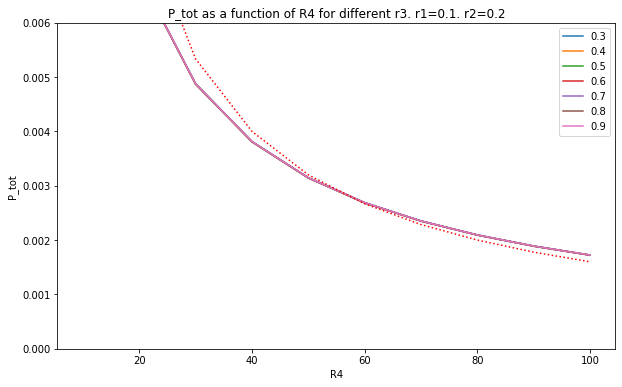

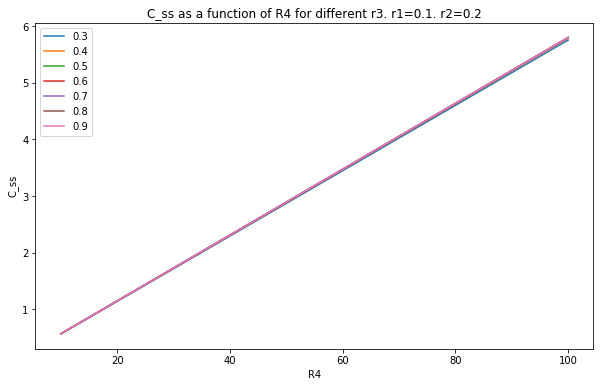

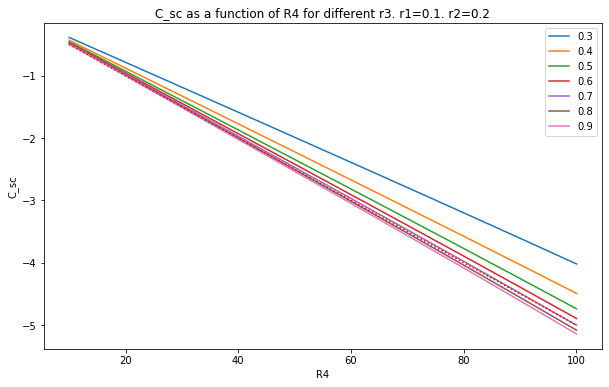

In [58]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_4P.xlsx')
dfss = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_4ss.xlsx')
dfsc = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_4sc.xlsx')
df2=df.as_matrix()
df2ss=dfss.as_matrix()
df2sc=dfsc.as_matrix()
P_tot = df2[0:10, 1:9]
C_ss = df2ss[0:10, 1:9]
C_sc = df2sc[0:10, 1:9]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
r3 = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

fig1 = plt.figure(figsize=(10,6))
for i in range(len(r3)):
    plt.plot(tot, P_tot[:,i])
plt.xlabel('R4')
plt.ylabel('P_tot')
plt.title('P_tot as a function of R4 for different r3. r1=0.1. r2=0.2')
plt.legend(r3)
plt.ylim((0,0.006))
#plt.xlim((0,0.5))

plt.plot(tot, 1/tot*0.16, 'r:')

fig2 = plt.figure(figsize=(10,6))
for i in range(len(r3)):
    plt.plot(tot, C_ss[:,i])
plt.xlabel('R4')
plt.ylabel('C_ss')
plt.title('C_ss as a function of R4 for different r3. r1=0.1. r2=0.2')
plt.legend(r3)

fig3 = plt.figure(figsize=(10,6))
for i in range(len(r3)):
    plt.plot(tot, C_sc[:,i])
plt.xlabel('R4')
plt.ylabel('C_sc')
plt.title('C_sc as a function of R4 for different r3. r1=0.1. r2=0.2')
plt.legend(r3)

plt.plot(tot, tot*-.050, 'r:')

C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


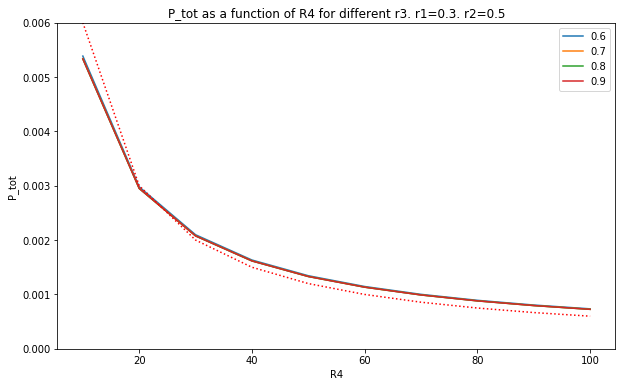

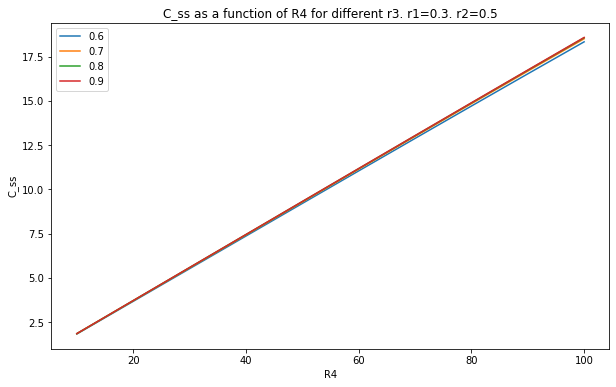

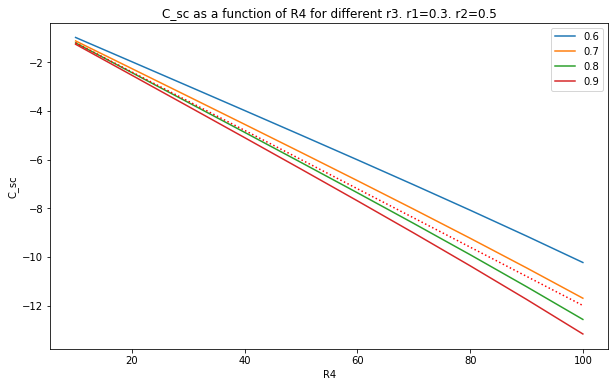

In [57]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_5P.xlsx')
dfss = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_5ss.xlsx')
dfsc = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Coaxmons\R4_5sc.xlsx')
df2=df.as_matrix()
df2ss=dfss.as_matrix()
df2sc=dfsc.as_matrix()
P_tot = df2[0:10, 1:6]
C_ss = df2ss[0:10, 1:6]
C_sc = df2sc[0:10, 1:6]
tot = np.array([10,20,30,40,50,60,70,80,90,100])
r3 = np.array([0.6, 0.7, 0.8, 0.9])

fig1 = plt.figure(figsize=(10,6))
for i in range(len(r3)):
    plt.plot(tot, P_tot[:,i])
plt.xlabel('R4')
plt.ylabel('P_tot')
plt.title('P_tot as a function of R4 for different r3. r1=0.3. r2=0.5')
plt.legend(r3)
plt.ylim((0,0.006))
#plt.xlim((0,0.5))

plt.plot(tot, 1/tot*0.06, 'r:')

fig2 = plt.figure(figsize=(10,6))
for i in range(len(r3)):
    plt.plot(tot, C_ss[:,i])
plt.xlabel('R4')
plt.ylabel('C_ss')
plt.title('C_ss as a function of R4 for different r3. r1=0.3. r2=0.5')
plt.legend(r3)

fig3 = plt.figure(figsize=(10,6))
for i in range(len(r3)):
    plt.plot(tot, C_sc[:,i])
plt.xlabel('R4')
plt.ylabel('C_sc')
plt.title('C_sc as a function of R4 for different r3. r1=0.3. r2=0.5')
plt.legend(r3)

plt.plot(tot, tot*-.120, 'r:')